In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read, Understand and Visualize Data

In [2]:
bike_demand = pd.read_csv('./data/day.csv')
print(f'Shape of dataframe: {bike_demand.shape}')
bike_demand.head()

Shape of dataframe: (730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
## All columns have non null values
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_demand.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Drop all unnecessary columns

1. Drop all unique columns
2. Drop columns that does not add much information to analysis

In [5]:
# Drop Columns which have 100% unique values i.e. columns which uniquely identify row

(bike_demand.nunique() / len(bike_demand.index)) * 100

instant       100.000000
dteday        100.000000
season          0.547945
yr              0.273973
mnth            1.643836
holiday         0.273973
weekday         0.958904
workingday      0.273973
weathersit      0.410959
temp           68.219178
atemp          94.383562
hum            81.369863
windspeed      88.904110
casual         82.876712
registered     92.876712
cnt            95.205479
dtype: float64

In [6]:
bike_demand = bike_demand.drop(columns = ['instant', 'dteday'], axis = 'column')
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Drop Columns: casual and registered

- casual: count of casual users
- registered: count of registered users

Columns only give the number of users registered or not on a given day, so we drop these columns.

In [7]:
bike_demand = bike_demand.drop(columns = ['casual', 'registered'], axis = 'columns')
bike_demand

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


### Categorical variables

Following are categorical variables:

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

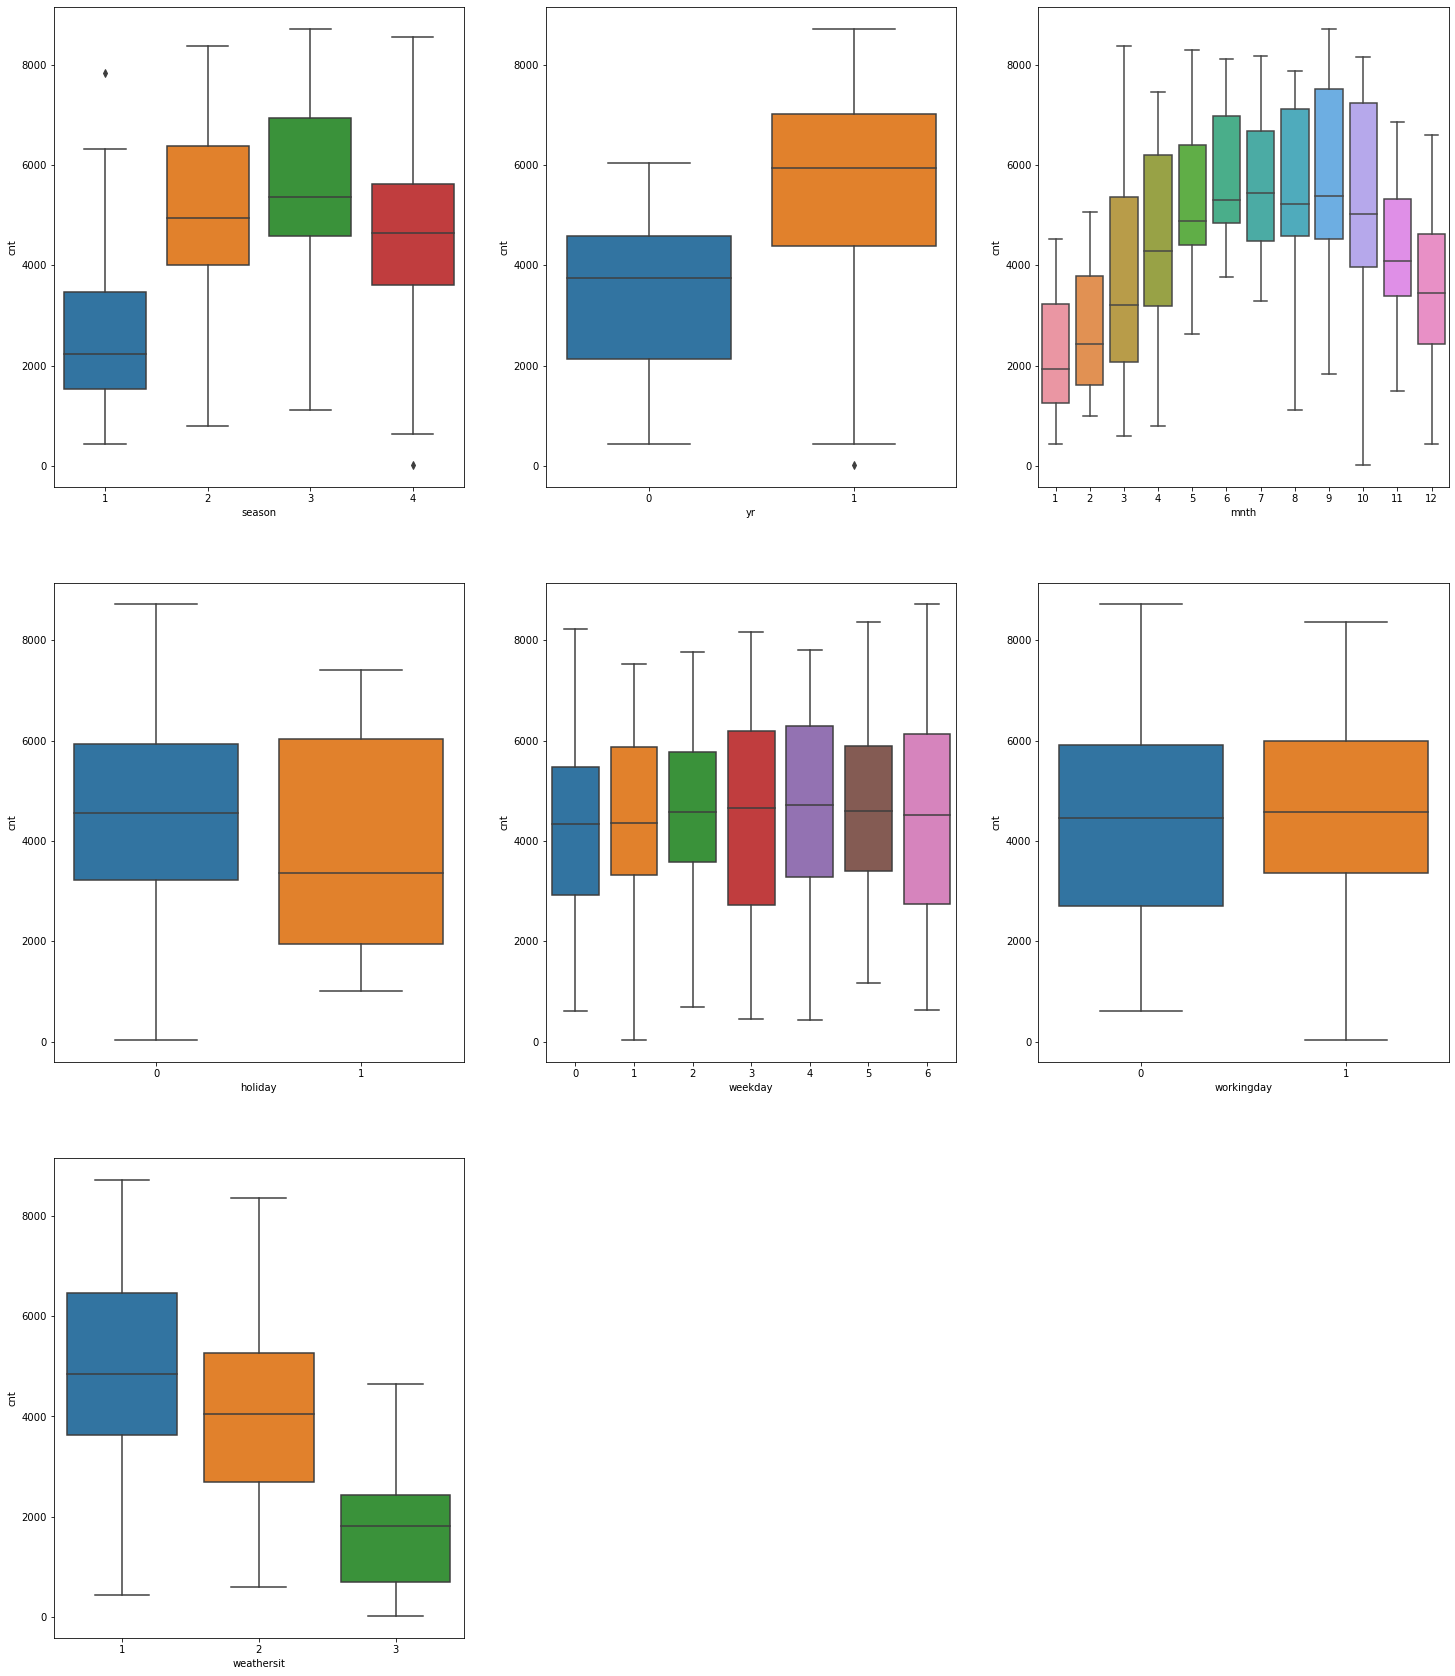

In [8]:
## Visualize Categorical variable:

catg_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
rows = 3
cols = 3

plt.figure(figsize = [25, 30])
for idx in range(1, len(catg_vars) + 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(data = bike_demand, x = catg_vars[idx - 1], y = 'cnt')

plt.show()

### Dummy Variables

Create dummy variables for season, mnth, weekday, weathersit

In [9]:
bike_demand = pd.get_dummies(data = bike_demand, columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first = True)
bike_demand.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


### Visualize Numerical data

From ScatterPlot below, we can clearly observe that cnt has linear relationship with temp and atemp columns.

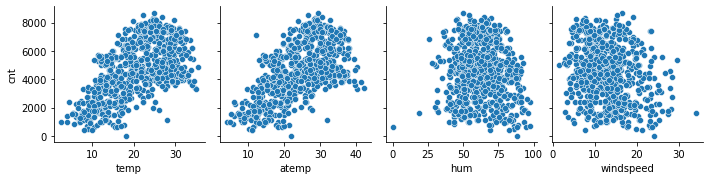

In [10]:
sns.pairplot(data = bike_demand, x_vars = ['temp', 'atemp', 'hum', 'windspeed'], y_vars = ['cnt'])
plt.show()

## Split Train and Test

Split bike demand data set into Train and Test dataset.

In [11]:
from sklearn.model_selection import train_test_split
(bike_demand_train, bike_demand_test) = train_test_split(bike_demand, train_size = 0.7, random_state = 267)

In [12]:
bike_demand_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
140,0,0,0,24.702500,28.59875,62.6667,8.083550,5805,1,0,...,0,0,0,0,0,0,0,1,0,0
257,0,0,1,23.677500,27.68355,70.9167,18.166782,3659,0,1,...,0,0,0,0,0,1,0,0,1,0
109,0,0,1,24.395000,28.21960,61.4167,16.208975,3944,1,0,...,0,0,0,0,1,0,0,0,0,0
352,0,0,1,11.343347,14.04665,63.7500,11.584032,3403,0,0,...,0,1,1,0,0,0,0,0,0,0
672,1,0,0,13.359153,16.47690,53.2917,12.000236,5107,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
bike_demand_train.shape

(510, 30)

In [14]:
bike_demand_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
239,0,0,0,28.989419,32.39795,56.1765,20.412153,4334,0,1,...,0,0,0,0,0,0,0,0,0,0
618,1,0,1,23.677500,27.71460,52.0000,6.167631,7767,0,1,...,0,0,0,1,0,0,0,0,0,0
510,1,0,0,28.392500,32.13480,73.2500,13.332464,6536,1,0,...,0,0,0,0,0,0,0,1,0,0
43,0,0,0,12.977402,16.20565,45.7391,17.479161,1589,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,1,32.560847,36.96375,55.9167,13.417018,4258,0,1,...,0,0,0,1,0,0,0,0,0,0


In [15]:
bike_demand_test.shape

(220, 30)

## Rescaling the Features

Use MinMaxScaler to normalize the range of predictor and target variables.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_demand_train[columns] = scaler.fit_transform(bike_demand_train[columns])
bike_demand_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
140,0,0,0,0.687778,0.647005,0.644388,0.168428,0.665324,1,0,...,0,0,0,0,0,0,0,1,0,0
257,0,0,1,0.656134,0.622978,0.729221,0.491965,0.418431,0,1,...,0,0,0,0,0,1,0,0,1,0
109,0,0,1,0.678285,0.637051,0.631534,0.429145,0.451220,1,0,...,0,0,0,0,1,0,0,0,0,0
352,0,0,1,0.275350,0.264973,0.655527,0.280747,0.388978,0,0,...,0,1,1,0,0,0,0,0,0,0
672,1,0,0,0.337583,0.328774,0.547987,0.294101,0.585021,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
bike_demand_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.029412,0.682353,0.555718,0.522733,0.651555,0.316227,0.520108,0.260784,0.256863,...,0.092157,0.076471,0.147059,0.141176,0.139216,0.133333,0.150980,0.150980,0.347059,0.029412
std,0.500352,0.169124,0.466018,0.229253,0.211060,0.148042,0.165119,0.228775,0.439494,0.437332,...,0.289531,0.266010,0.354512,0.348545,0.346511,0.340268,0.358381,0.358381,0.476502,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.358943,0.343262,0.547023,0.199170,0.350437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.569112,0.547122,0.654884,0.292096,0.532329,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.753967,0.697145,0.755248,0.409083,0.700616,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Build Linear Model

In [19]:
Y_train = bike_demand_train.pop('cnt')
X_train = bike_demand_train

### Feature Selection

Using RFE for feature elimination.

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

rfe = RFE(estimator = lr_model, n_features_to_select = 15)
rfe = rfe.fit(X_train, Y_train)

In [21]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 2),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 4),
 ('mnth_7', False, 9),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 10),
 ('weekday_1', False, 7),
 ('weekday_2', False, 14),
 ('weekday_3', False, 11),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', False, 5),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [22]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

### Build model using statsmodel

In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train[columns]

In [24]:
def train_model(x_train, y_train):
    "Train and return Linear Regression model using OLS"
    x_train = sm.add_constant(x_train)    
    lm = sm.OLS(y_train, x_train).fit()
    return lm

In [25]:
def calculate_vif(x_train):
    "Calculate VIF for X variables to find multicollinearity"
    vif = pd.DataFrame()
    vif['features'] = x_train.columns
    vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    vif
    return vif

In [26]:
def run_model(x_train, y_train):
    "Train Model and Calculate VIF"
    lm = train_model(x_train, y_train)
    vif = calculate_vif(x_train)
    
    print(lm.summary())
    print('=' * 78)
    print('Variance Inflation Factor')
    print('=' * 78)
    print(vif)
    
    return lm

In [27]:
lm = run_model(X_train_rfe, Y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          6.93e-191
Time:                        21:52:20   Log-Likelihood:                 509.33
No. Observations:                 510   AIC:                            -986.7
Df Residuals:                     494   BIC:                            -918.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2413      0.028      8.549   

Remove temp from X_train dataset.

- Has very P value - 0.552
- Has bery high VIF - 1137.23

In [28]:
X_train_rfe = X_train_rfe.drop(columns = 'temp', axis = 'column')
lm = run_model(X_train_rfe, Y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          5.78e-192
Time:                        21:52:26   Log-Likelihood:                 509.15
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2418      0.028      8.578   

Drop season_3 from the X_train_rfe dataframe. 

**Note: We are leaving atemp and hum as is, since actual temperature and humidity might affect the bike demand. On days with very high humidity and very high or low actual temperature might have low bike demands.**

In [29]:
# season_3 
X_train_rfe = X_train_rfe.drop(columns = 'season_3', axis = 'column')
lm = run_model(X_train_rfe, Y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          8.11e-191
Time:                        21:52:30   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     496   BIC:                            -920.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2403      0.028      8.443   

## Residual Analysis

In [30]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
Y_train_pred = lm.predict(X_train_rfe_sm)

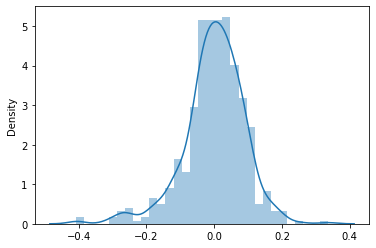

In [31]:
res = Y_train - Y_train_pred
sns.distplot(res)
plt.show()

## Prediction and Evaluation on Test Set

In [32]:
bike_demand_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
239,0,0,0,28.989419,32.39795,56.1765,20.412153,4334,0,1,...,0,0,0,0,0,0,0,0,0,0
618,1,0,1,23.677500,27.71460,52.0000,6.167631,7767,0,1,...,0,0,0,1,0,0,0,0,0,0
510,1,0,0,28.392500,32.13480,73.2500,13.332464,6536,1,0,...,0,0,0,0,0,0,0,1,0,0
43,0,0,0,12.977402,16.20565,45.7391,17.479161,1589,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,1,32.560847,36.96375,55.9167,13.417018,4258,0,1,...,0,0,0,1,0,0,0,0,0,0


In [33]:
columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_demand_test[columns] = scaler.transform(bike_demand_test[columns])
bike_demand_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
239,0,0,0,0.820125,0.746744,0.577650,0.564011,0.496088,0,1,...,0,0,0,0,0,0,0,0,0,0
618,1,0,1,0.656134,0.623794,0.534704,0.106953,0.891049,0,1,...,0,0,0,1,0,0,0,0,0,0
510,1,0,0,0.801697,0.739836,0.753213,0.336848,0.749425,1,0,...,0,0,0,0,0,0,0,1,0,0
43,0,0,0,0.325797,0.321653,0.470325,0.469901,0.180281,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,1,0.930383,0.866609,0.574979,0.339561,0.487345,0,1,...,0,0,0,1,0,0,0,0,0,0


In [34]:
bike_demand_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.527273,0.027273,0.686364,0.544899,0.510646,0.631133,0.324088,0.506834,0.231818,0.259091,...,0.059091,0.104545,0.136364,0.145455,0.145455,0.163636,0.122727,0.127273,0.313636,0.027273
std,0.500394,0.163248,0.465029,0.237796,0.220818,0.141832,0.170618,0.208267,0.422956,0.439135,...,0.236333,0.306665,0.343957,0.353363,0.353363,0.370789,0.328872,0.334038,0.465029,0.163248
min,0.000000,0.000000,0.000000,0.061225,0.048706,0.320051,-0.042808,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341802,0.331402,0.519755,0.198509,0.379573,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.515845,0.494922,0.614182,0.306795,0.499367,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756604,0.694247,0.738432,0.413116,0.637512,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.015822,0.952767,0.997858,0.816863,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
columns = X_train_rfe.columns
Y_test = bike_demand_test.pop('cnt')
X_test = bike_demand_test[columns]

In [36]:
X_test.head()

,yr,holiday,atemp,hum,windspeed,season_2,season_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
239,0,0,0.746744,0.577650,0.564011,0,0,0,1,0,0,0,0
618,1,0,0.623794,0.534704,0.106953,0,0,0,0,1,0,0,0
510,1,0,0.739836,0.753213,0.336848,1,0,1,0,0,0,0,0
43,0,0,0.321653,0.470325,0.469901,0,0,0,0,0,0,0,0
192,0,0,0.866609,0.574979,0.339561,0,0,0,0,0,0,0,0


In [37]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,atemp,hum,windspeed,season_2,season_4,mnth_5,mnth_8,mnth_9,mnth_10,weathersit_2,weathersit_3
239,1.0,0,0,0.746744,0.577650,0.564011,0,0,0,1,0,0,0,0
618,1.0,1,0,0.623794,0.534704,0.106953,0,0,0,0,1,0,0,0
510,1.0,1,0,0.739836,0.753213,0.336848,1,0,1,0,0,0,0,0
43,1.0,0,0,0.321653,0.470325,0.469901,0,0,0,0,0,0,0,0
192,1.0,0,0,0.866609,0.574979,0.339561,0,0,0,0,0,0,0,0


In [38]:
Y_test_pred = lm.predict(X_test_sm)

<AxesSubplot:ylabel='Density'>

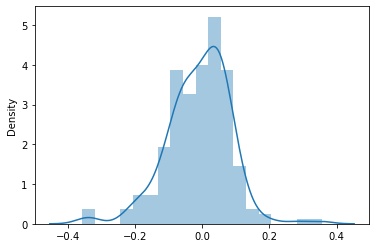

In [39]:
res = Y_test - Y_test_pred
sns.distplot(res)

In [40]:
from sklearn.metrics import r2_score
r2_score(y_true = Y_test, y_pred = Y_test_pred)

0.7913761649880895